In [1]:
import numpy as np

In [2]:
import fitsio

In [3]:
import proplot as pplt

In [4]:
d = fitsio.read("mdet_data/DES0000+0209_metadetect-v8_mdetcat_part0000.fits")

In [5]:
d.dtype.names

('slice_id',
 'mdet_step',
 'ra',
 'dec',
 'ra_noshear',
 'dec_noshear',
 'y_noshear',
 'x_noshear',
 'y',
 'x',
 'slice_y',
 'slice_x',
 'slice_y_noshear',
 'slice_x_noshear',
 'hpix_16384',
 'hpix_16384_noshear',
 'filename',
 'tilename',
 'mask_flags',
 'mask_flags_noshear',
 'nepoch_g',
 'nepoch_r',
 'nepoch_i',
 'nepoch_z',
 'nepoch_eff_g',
 'nepoch_eff_r',
 'nepoch_eff_i',
 'nepoch_eff_z',
 'pgauss_flags',
 'pgauss_psf_flags',
 'pgauss_psf_g_1',
 'pgauss_psf_g_2',
 'pgauss_psf_T',
 'pgauss_obj_flags',
 'pgauss_s2n',
 'pgauss_g_1',
 'pgauss_g_2',
 'pgauss_g_cov_1_1',
 'pgauss_g_cov_1_2',
 'pgauss_g_cov_2_2',
 'pgauss_T',
 'pgauss_T_flags',
 'pgauss_T_err',
 'pgauss_T_ratio',
 'pgauss_band_flux_flags_g',
 'pgauss_band_flux_flags_r',
 'pgauss_band_flux_flags_i',
 'pgauss_band_flux_flags_z',
 'pgauss_band_flux_g',
 'pgauss_band_flux_r',
 'pgauss_band_flux_i',
 'pgauss_band_flux_z',
 'pgauss_band_flux_err_g',
 'pgauss_band_flux_err_r',
 'pgauss_band_flux_err_i',
 'pgauss_band_flux_err

In [6]:
msk = (
    (d["gauss_flags"] == 0)
    & (d["pgauss_flags"] == 0)
    & (d["mask_flags"] == 0)
    & (d["psfrec_flags"] == 0)
    & (d["mdet_step"] == "noshear")
    & (d["gauss_s2n"] > 10)
    & (d["gauss_T_ratio"] > 0.5)
)
np.sum(msk)*10000/1e6, np.mean(msk)

(178.7, 0.01136571789105193)

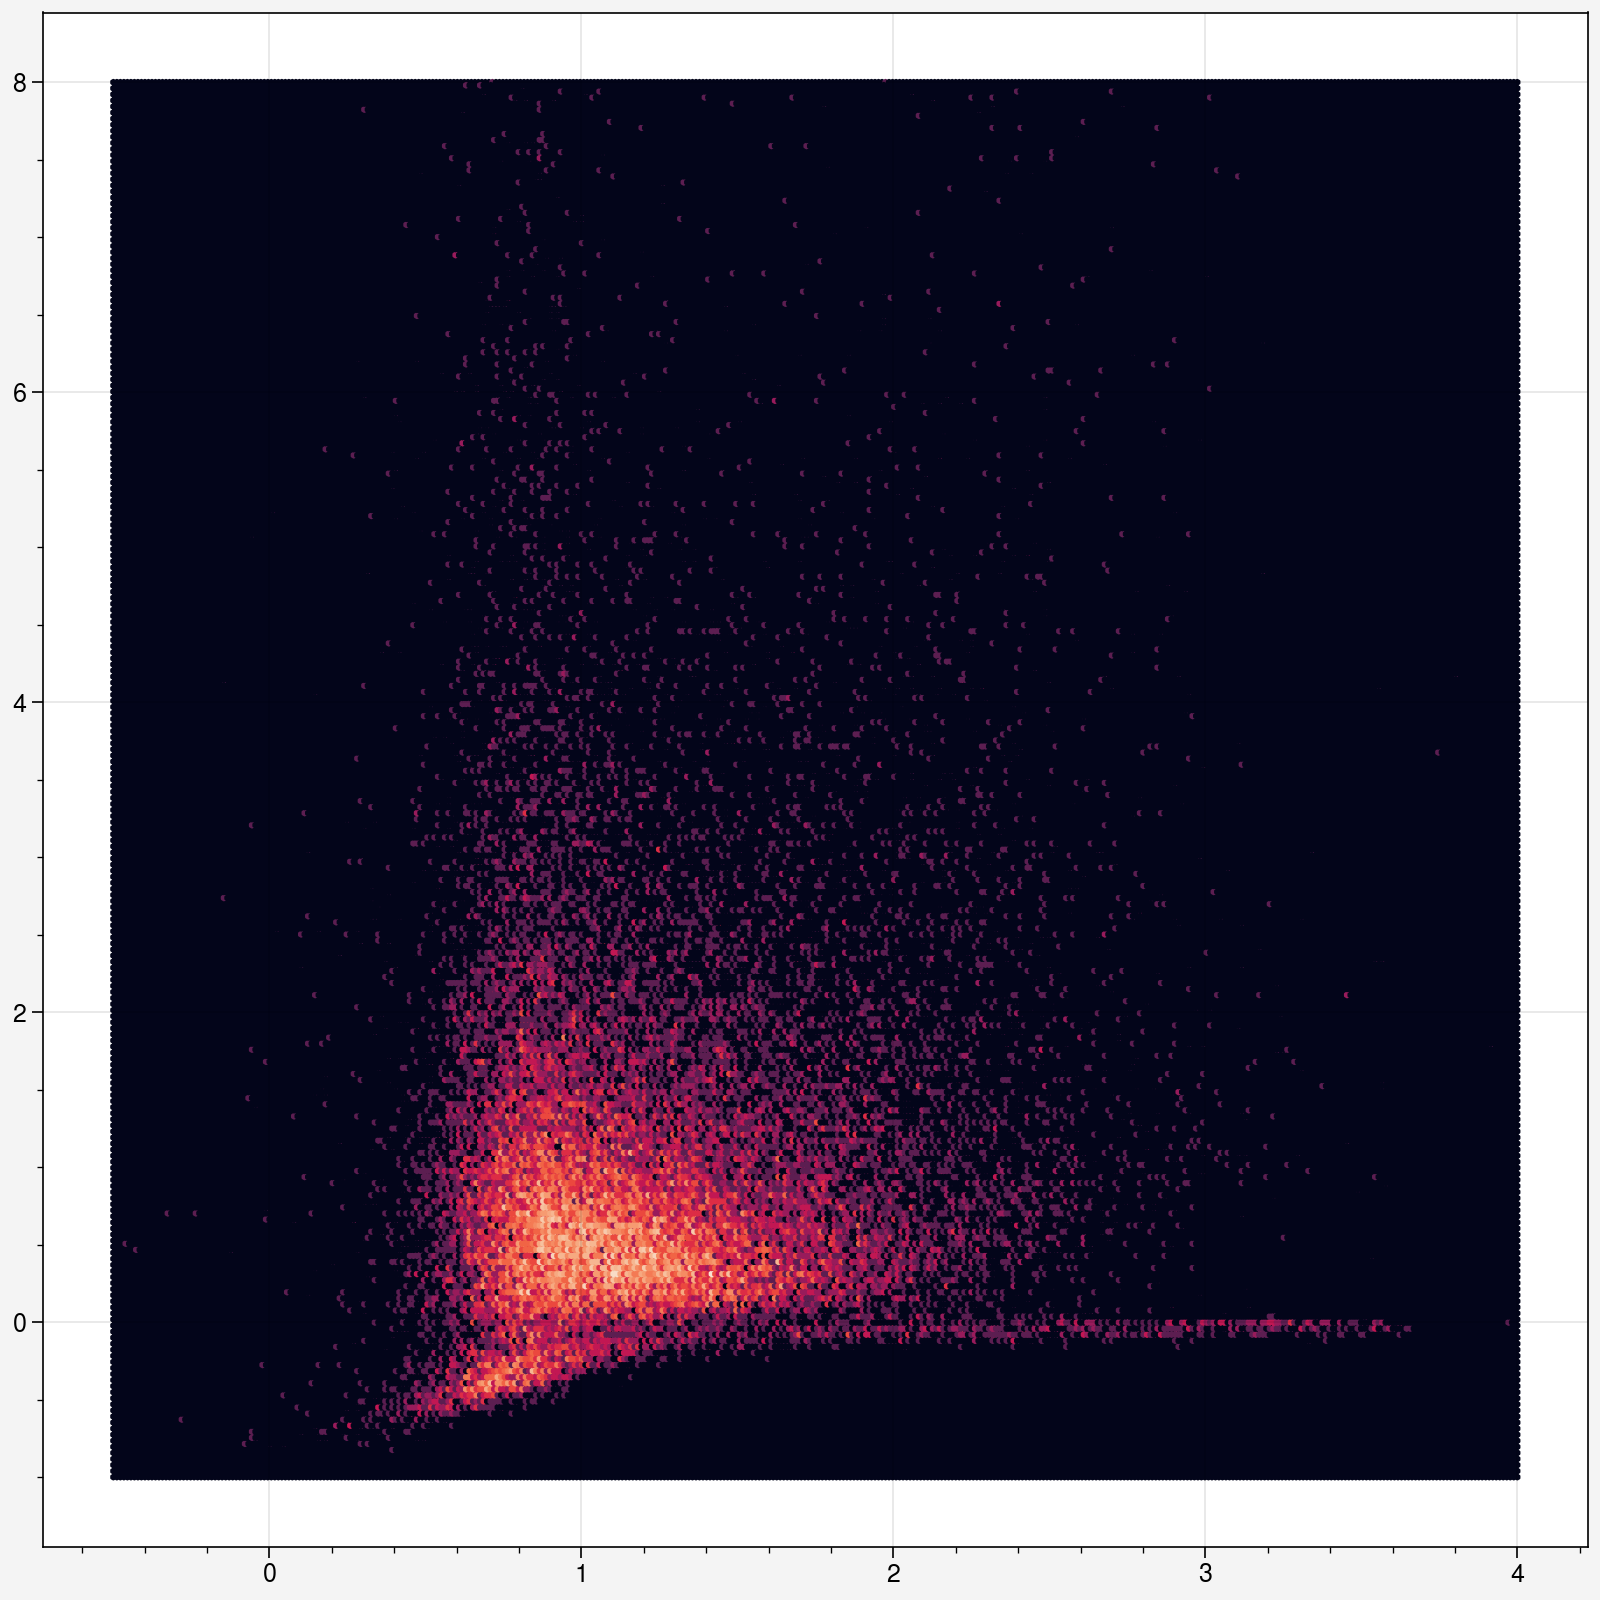

In [7]:
msk = (
    (d["gauss_flags"] == 0)
    & (d["pgauss_flags"] == 0)
    & (d["mask_flags"] == 0)
    & (d["psfrec_flags"] == 0)
    & (d["mdet_step"] == "noshear")
)

fig, axs = pplt.subplots(figsize=(8, 8))

axs.hexbin(
    np.log10(d["gauss_s2n"][msk]), 
    d["gauss_T_ratio"][msk], 
    cmap="rocket",
    norm="log",
    extent=(-0.5, 4, -1, 8),
    gridsize=400,
)
# axs.axhline(0, color="blue")

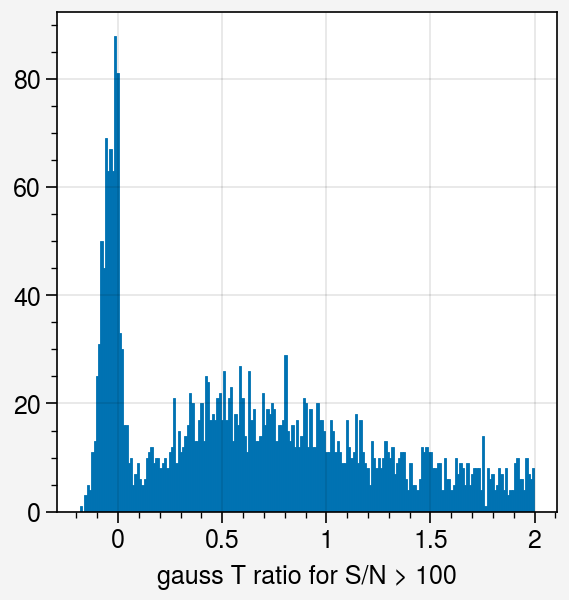

In [8]:
fig, axs = pplt.subplots()

axs.hist(
    d["gauss_T_ratio"][msk & (d["gauss_T_ratio"] < 2) & (d["gauss_s2n"] > 100)], 
    bins=200
);
axs.format(xlabel="gauss T ratio for S/N > 100")
# axs.axhline(0, color="blue")

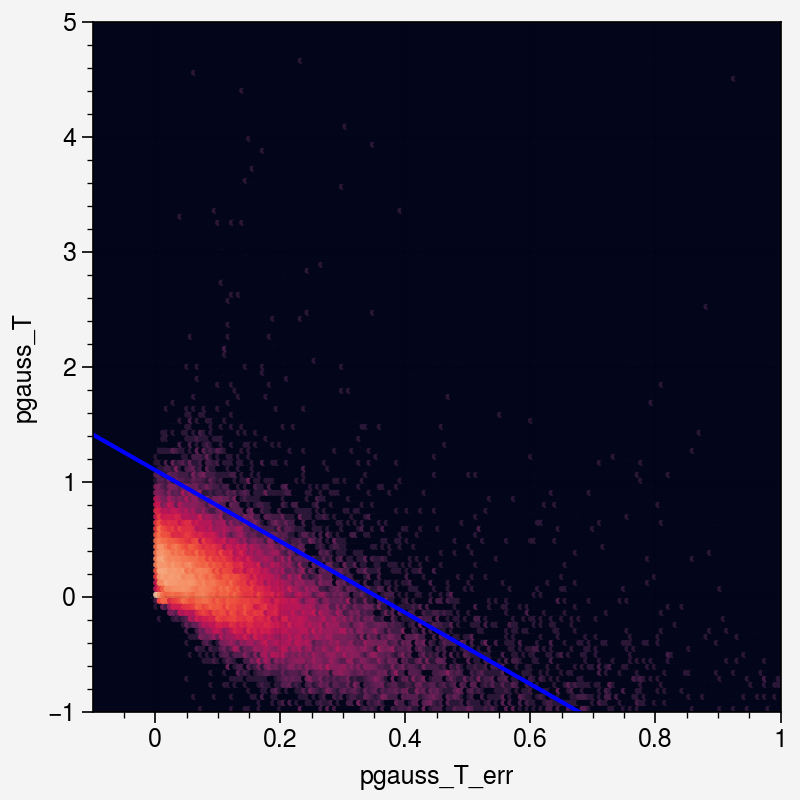

In [29]:
msk = (
    (d["gauss_flags"] == 0)
    # (d["pgauss_T_flags"] == 0)
    & (d["mask_flags"] == 0)
    & (d["psfrec_flags"] == 0)
    & (d["mdet_step"] == "noshear")
)

fig, axs = pplt.subplots(figsize=(4, 4))

xx = np.linspace(-0.1, 1.0, 100)
yy = (1.1 - 3.1*xx)

axs.hexbin(
    d["pgauss_T_err"][msk], 
    d["pgauss_T"][msk], 
    cmap="rocket",
    norm="log",
    gridsize=200,
    extent=(-0.1, 1, -1, 5)
)
axs.plot(xx, yy, 'b')
axs.format(xlim=(-0.1, 1), ylim=(-1, 5), xlabel="pgauss_T_err", ylabel="pgauss_T")

In [17]:
np.arange

<function numpy.arange>

/gpfs02/astro/workarea/beckermr/tmp/ipykernel_17644/3241707152.py:10: RuntimeWarning: invalid value encountered in log10
  np.log10(d["pgauss_band_flux_r"][msk]),


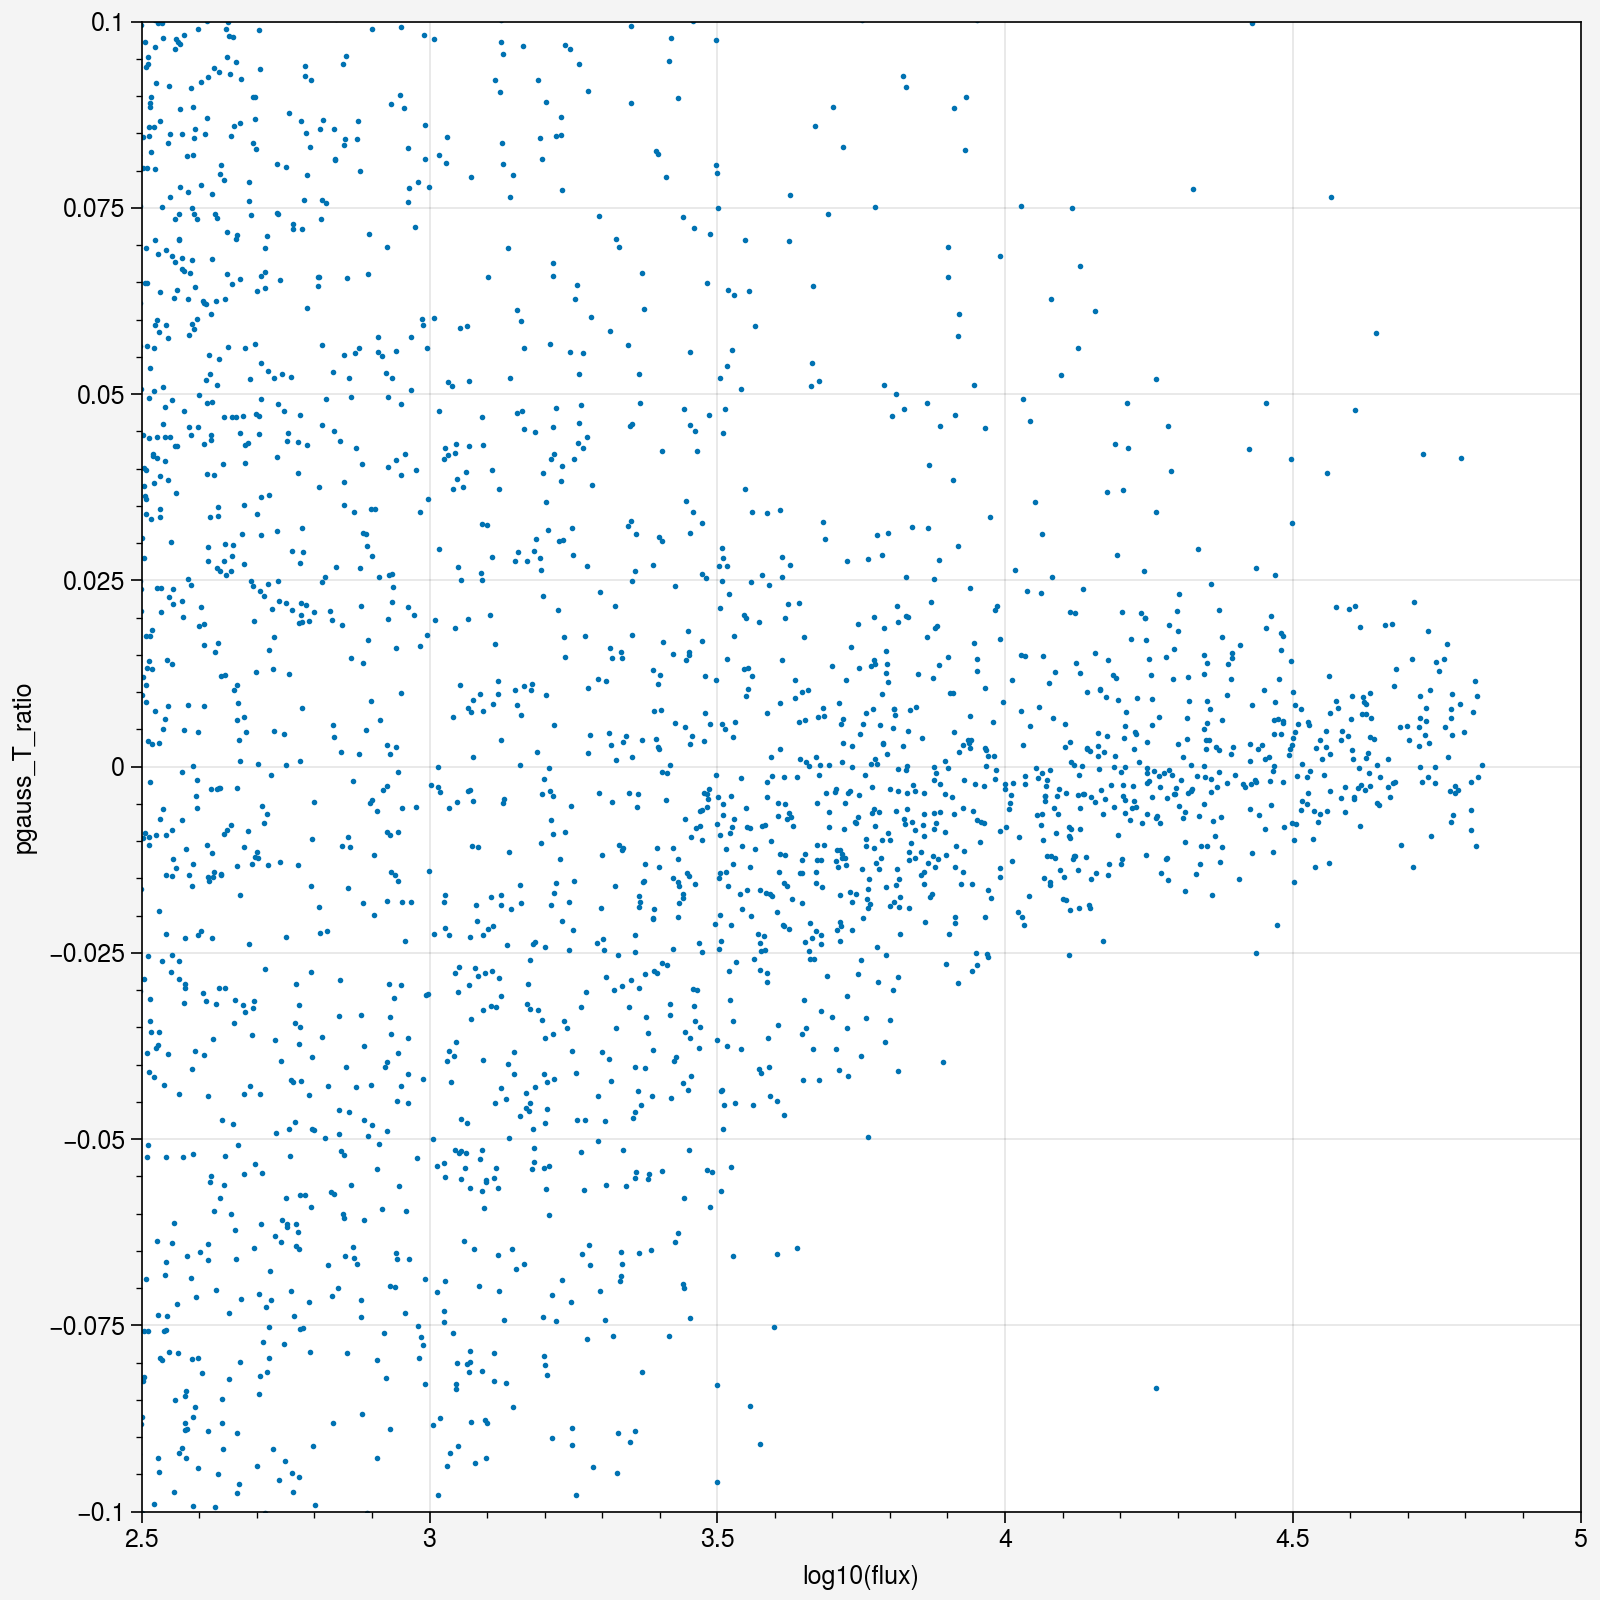

In [10]:
msk = (
    (d["mask_flags"] == 0)
    & (d["psfrec_flags"] == 0)
    & (d["mdet_step"] == "noshear")
)

fig, axs = pplt.subplots(figsize=(8, 8))

axs.plot(
    np.log10(d["pgauss_band_flux_r"][msk]), 
    d["pgauss_T_ratio"][msk], 
    ".",
    markersize=2,
)
# axs.axhline(0, color="blue")
axs.format(xlabel="log10(flux)", ylabel="pgauss_T_ratio", ylim=(-0.1, 0.1), xlim=(2.5, 5))